In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statsmodels.api as sm

In [3]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.tree import plot_tree
from sklearn.inspection import PartialDependenceDisplay
from functools import reduce


In [4]:
# Loading Dataset
df = pd.read_csv("train.csv")

In [5]:
df.shape

(909604, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 909604 entries, 0 to 909603
Data columns (total 16 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   timestamp                               909604 non-null  object 
 1   active_power_calculated_by_converter    909604 non-null  float64
 2   active_power_raw                        909604 non-null  float64
 3   ambient_temperature                     909604 non-null  float64
 4   generator_speed                         909604 non-null  float64
 5   generator_winding_temp_max              909604 non-null  float64
 6   grid_power10min_average                 909604 non-null  float64
 7   nc1_inside_temp                         909604 non-null  float64
 8   nacelle_temp                            909604 non-null  float64
 9   reactice_power_calculated_by_converter  909604 non-null  float64
 10  reactive_power                          9096

In [7]:
df.head()

timestamp  active_power_calculated_by_converter  \
0  2021-02-19 20:18:00                            816.636759   
1  2021-04-27 04:55:00                            419.107829   
2  2021-01-25 06:26:00                           1303.530558   
3  2021-10-30 03:47:00                             61.494872   
4  2021-03-15 00:39:00                            593.514364   

   active_power_raw  ambient_temperature  generator_speed  \
0        834.917206            31.694380      1159.616602   
1        421.050873            12.894948       928.747996   
2       1337.566142            16.648388      1201.219775   
3         53.481008            28.388141       769.806122   
4        611.659108            31.519527      1046.916768   

   generator_winding_temp_max  grid_power10min_average  nc1_inside_temp  \
0                   65.954214               917.897085        31.881972   
1                   59.571319               445.554250        32.423705   
2                   61.270498              1364.716003        11.446849   
3                   40.674348                14.324897        34.253204   
4                   64.341763               599.020172        32.405586   

   nacelle_temp  reactice_power_calculated_by_converter  reactive_power  \
0     31.504713                              141.457644      165.501518   
1     32.755770                               89.186457      113.835236   
2     18.332985                              230.622309      281.452253   
3     32.662889                               66.211015       75.017531   
4     31.466387                              137.163938      160.202421   

   wind_direction_raw  wind_speed_raw  wind_speed_turbulence   turbine_id  \
0          280.864782        7.057000               0.544082  Turbine_108   
1          299.552460        5.474937               0.469031   Turbine_18   
2           84.960106        8.092457               0.622318  Turbine_105   
3           87.261119        4.071032               0.760719   Turbine_15   
4          313.724818        6.357943               0.346068   Turbine_01   

      Target  
0  47.582787  
1  46.070328  
2  39.989236  
3  46.056587  
4  54.346095

In [8]:
df.describe()

active_power_calculated_by_converter  active_power_raw  \
count                         909604.000000     909604.000000   
mean                             525.886061        537.639468   
std                              474.619576        482.394907   
min                                0.000000          0.000008   
25%                              149.620898        155.813244   
50%                              379.989929        383.985926   
75%                              781.357475        800.261108   
max                             1999.999858       1999.984456   

       ambient_temperature  generator_speed  generator_winding_temp_max  \
count        909604.000000    909604.000000               909604.000000   
mean             25.573921       931.130882                   60.730112   
std               8.025649       193.674384                    9.721582   
min               5.616541         0.000000                   25.636366   
25%              17.093680       770.538574                   54.916767   
50%              27.919035       884.068502                   60.034490   
75%              32.171696      1123.335856                   65.737187   
max              48.089017      1267.140625                  129.846405   

       grid_power10min_average  nc1_inside_temp   nacelle_temp  \
count            909604.000000    909604.000000  909604.000000   
mean                527.579537        31.755823      31.686413   
std                 472.656976         3.929794       3.554426   
min                   0.000000        11.141922      16.010218   
25%                 147.181552        29.913803      30.267423   
50%                 391.303187        31.762946      31.961610   
75%                 794.875710        33.469745      33.546260   
max                1999.991455        52.790030      48.406106   

       reactice_power_calculated_by_converter  reactive_power  \
count                           909604.000000   909604.000000   
mean                               111.080610      133.692333   
std                                 78.219944       91.232152   
min                               -318.393721       -5.461607   
25%                                 81.540850       96.045765   
50%                                 92.005826      107.633378   
75%                                124.879153      154.153730   
max                                523.892695      592.815938   

       wind_direction_raw  wind_speed_raw  wind_speed_turbulence  \
count       909604.000000   909604.000000          909604.000000   
mean           199.487161        5.894950               0.651916   
std            104.617261        1.977684               0.317513   
min              0.309692        0.904500               0.000000   
25%             98.916060        4.400753               0.432129   
50%            232.821159        5.637207               0.583863   
75%            287.667503        7.092771               0.798240   
max            359.455531       19.795001               9.534769   

              Target  
count  909604.000000  
mean       46.328595  
std         2.617691  
min        25.865320  
25%        44.816740  
50%        46.302899  
75%        47.733105  
max        65.037689

In [9]:
# Data Cleaning

In [10]:
# Drop Turbine_id
df = df.drop('turbine_id', axis = 1)

In [11]:
# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [12]:
# Extract time features
df['hour'] = df['timestamp'].dt.hour
df['day_of_week'] = df['timestamp'].dt.dayofweek
df['month'] = df['timestamp'].dt.month
df['season'] = df['month']%12 // 3 + 1

In [13]:
df = df.drop('timestamp', axis = 1)

In [14]:
df.head()

active_power_calculated_by_converter  active_power_raw  \
0                            816.636759        834.917206   
1                            419.107829        421.050873   
2                           1303.530558       1337.566142   
3                             61.494872         53.481008   
4                            593.514364        611.659108   

   ambient_temperature  generator_speed  generator_winding_temp_max  \
0            31.694380      1159.616602                   65.954214   
1            12.894948       928.747996                   59.571319   
2            16.648388      1201.219775                   61.270498   
3            28.388141       769.806122                   40.674348   
4            31.519527      1046.916768                   64.341763   

   grid_power10min_average  nc1_inside_temp  nacelle_temp  \
0               917.897085        31.881972     31.504713   
1               445.554250        32.423705     32.755770   
2              1364.716003        11.446849     18.332985   
3                14.324897        34.253204     32.662889   
4               599.020172        32.405586     31.466387   

   reactice_power_calculated_by_converter  reactive_power  wind_direction_raw  \
0                              141.457644      165.501518          280.864782   
1                               89.186457      113.835236          299.552460   
2                              230.622309      281.452253           84.960106   
3                               66.211015       75.017531           87.261119   
4                              137.163938      160.202421          313.724818   

   wind_speed_raw  wind_speed_turbulence     Target  hour  day_of_week  month  \
0        7.057000               0.544082  47.582787    20            4      2   
1        5.474937               0.469031  46.070328     4            1      4   
2        8.092457               0.622318  39.989236     6            0      1   
3        4.071032               0.760719  46.056587     3            5     10   
4        6.357943               0.346068  54.346095     0            0      3   

   season  
0       1  
1       2  
2       1  
3       4  
4       2

In [15]:
# Checking Null or missing vlaues in each column
df.isnull().sum()

active_power_calculated_by_converter      0
active_power_raw                          0
ambient_temperature                       0
generator_speed                           0
generator_winding_temp_max                0
grid_power10min_average                   0
nc1_inside_temp                           0
nacelle_temp                              0
reactice_power_calculated_by_converter    0
reactive_power                            0
wind_direction_raw                        0
wind_speed_raw                            0
wind_speed_turbulence                     0
Target                                    0
hour                                      0
day_of_week                               0
month                                     0
season                                    0
dtype: int64

In [16]:
# Exploratory Data Analysis ( EDA )

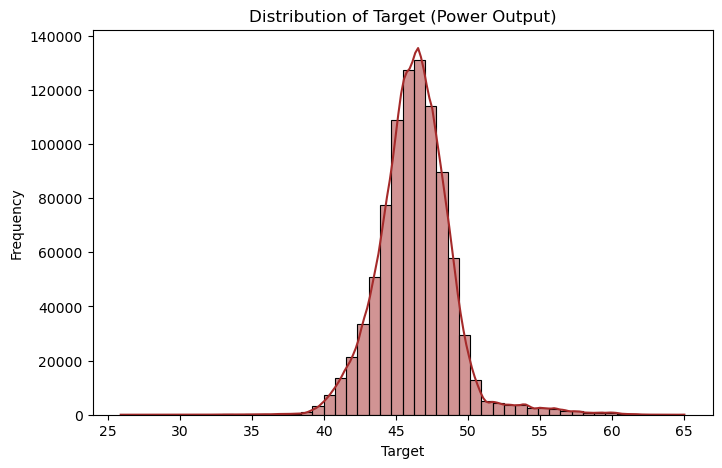

In [17]:
# Target Distribution
plt.figure(figsize = (8, 5))
sns.histplot(df['Target'], bins = 50, kde = True, color = 'brown')
plt.title('Distribution of Target (Power Output)')
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.show()

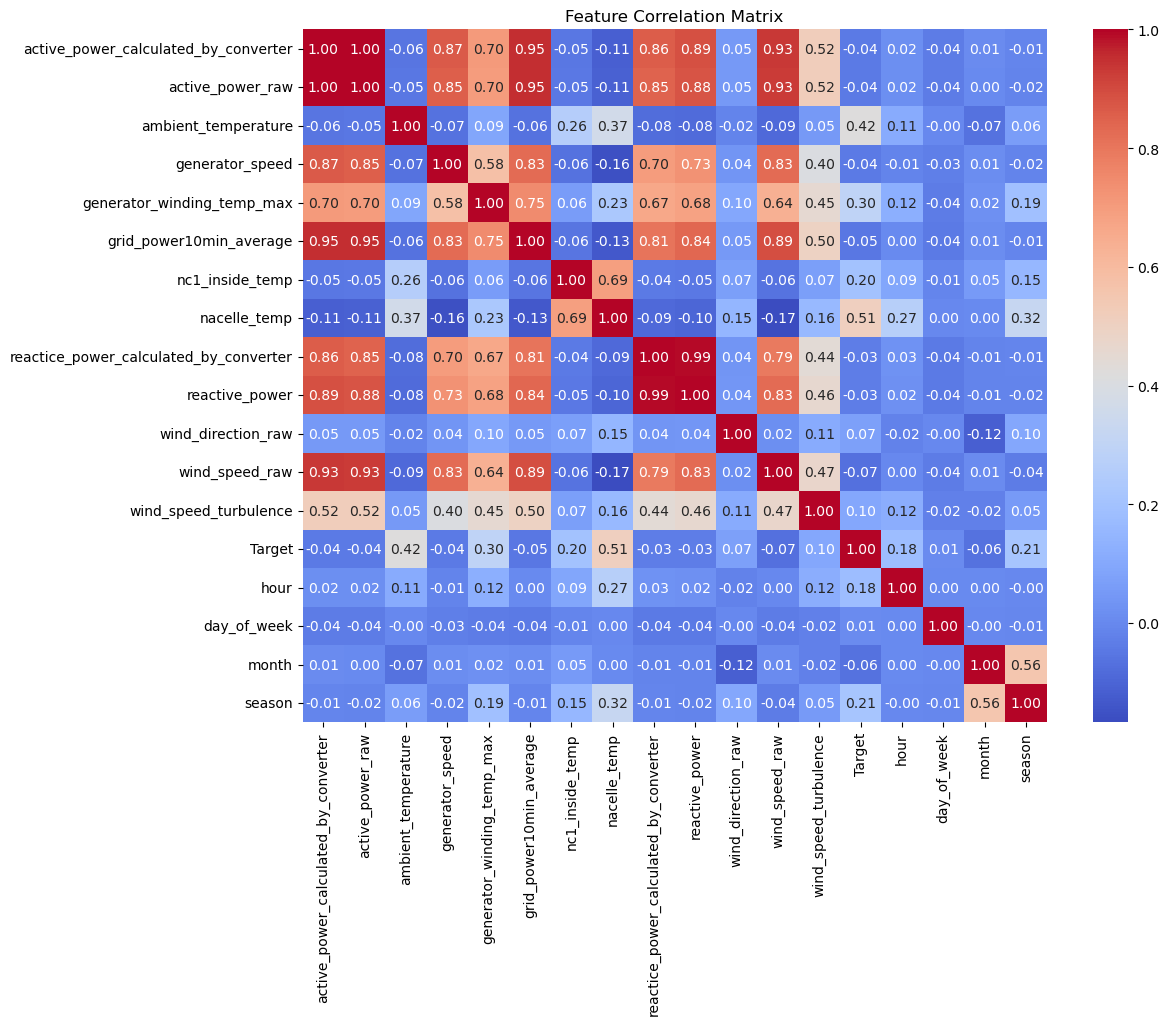

In [18]:
# Feature Correlation Matrix
corr = df.corr()
plt.figure(figsize = (12, 9))
sns.heatmap(corr, annot = True, fmt = ".2f", cmap = 'coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

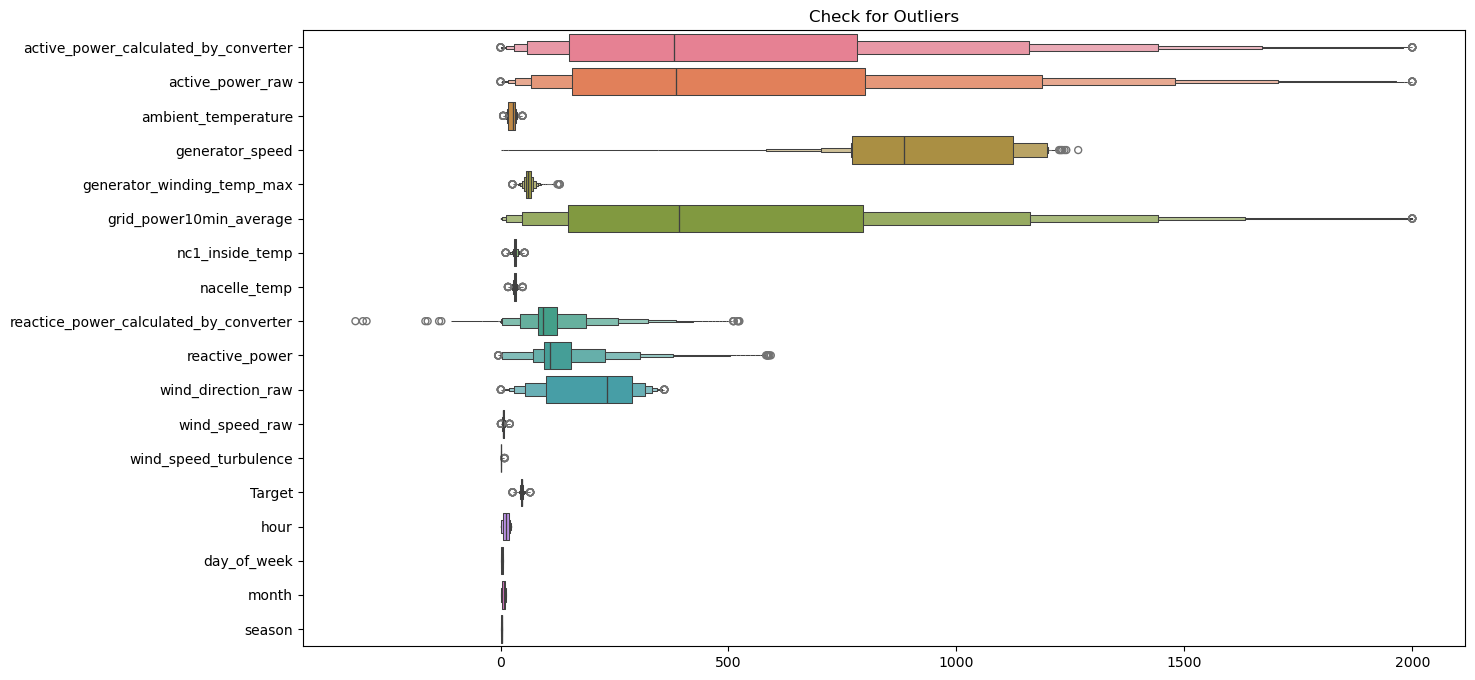

In [19]:
# Checking For Outliers
numeric_features = df.select_dtypes(include = np.number).columns.tolist()
plt.figure(figsize = (15, 8))
sns.boxenplot(data = df[numeric_features], orient = 'h')
plt.title('Check for Outliers')
# plt.savefig("outlier.png", dpi=300, bbox_inches="tight")
plt.show()


In [20]:
# Select all numeric features except Target
numeric_features = df.select_dtypes(include = np.number).columns.tolist()
numeric_features.remove('Target') 
print("Numeric features:", numeric_features)


Numeric features: ['active_power_calculated_by_converter', 'active_power_raw', 'ambient_temperature', 'generator_speed', 'generator_winding_temp_max', 'grid_power10min_average', 'nc1_inside_temp', 'nacelle_temp', 'reactice_power_calculated_by_converter', 'reactive_power', 'wind_direction_raw', 'wind_speed_raw', 'wind_speed_turbulence', 'hour', 'day_of_week', 'month', 'season']


In [21]:
# Blancing the extreme outliers and scaling numeric features

In [22]:
# Removing extreme outliers
for col in numeric_features:
    lower = df[col].quantile(0.01)
    upper = df[col].quantile(0.99)
    df[col] = df[col].clip(lower, upper)


In [23]:
# Scaling Numeric features
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])


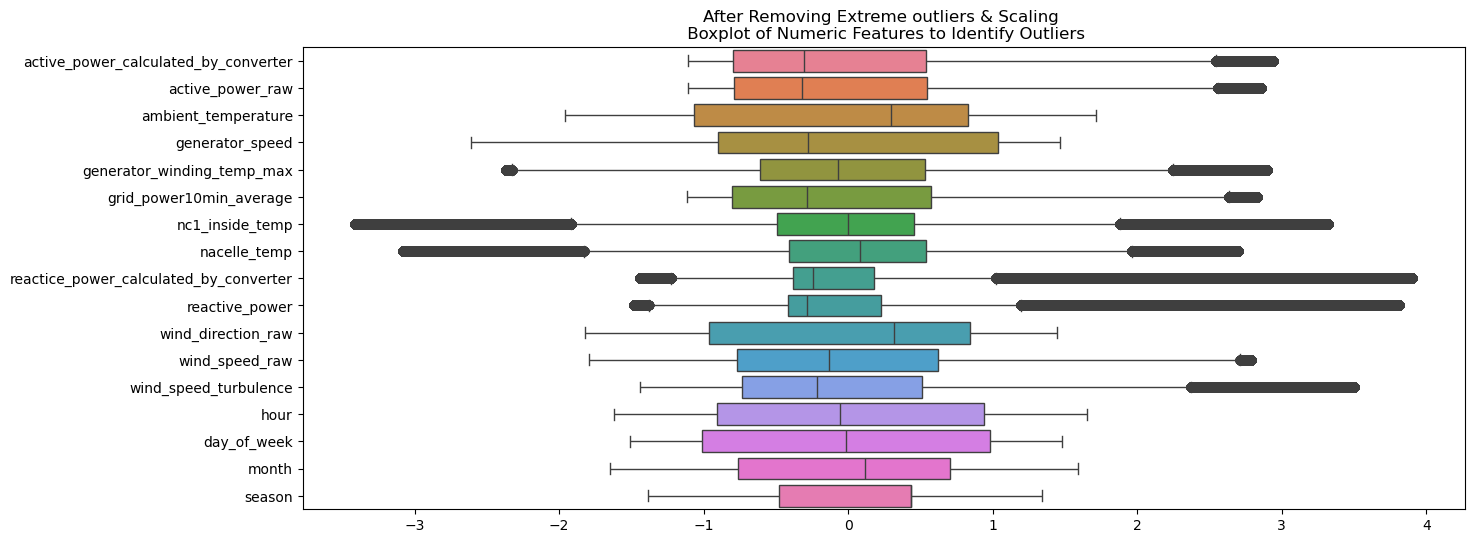

In [24]:
# Checking Outliers Again
plt.figure(figsize=(15,6))
sns.boxplot(data=df[numeric_features], orient='h')
plt.title('After Removing Extreme outliers & Scaling \n Boxplot of Numeric Features to Identify Outliers')
plt.show()


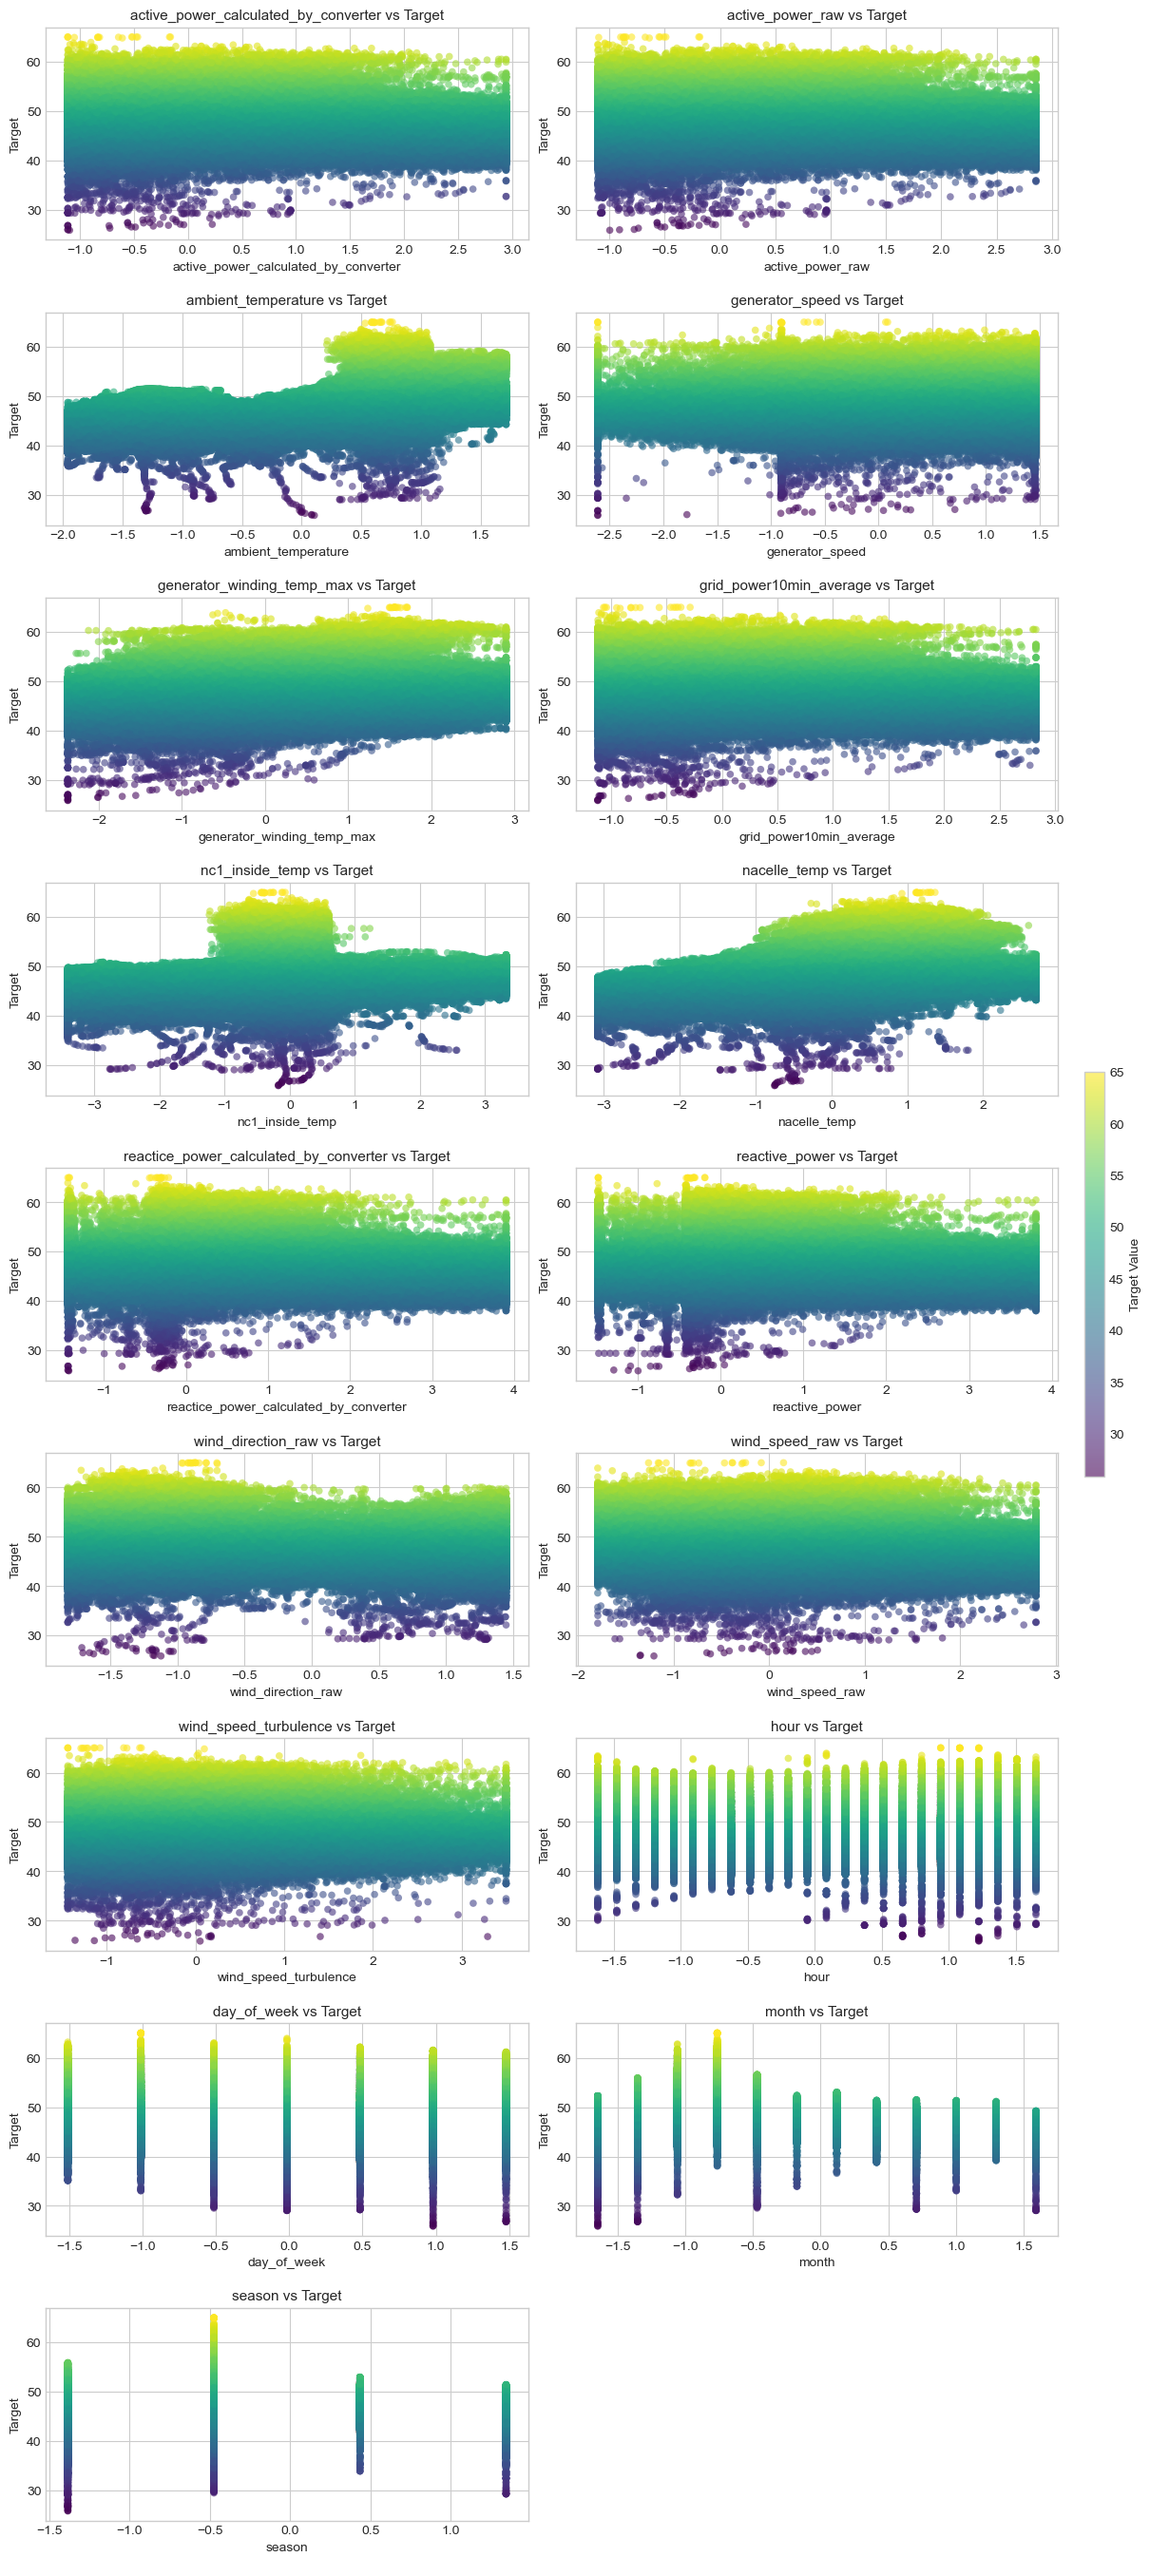

In [25]:
# Features vs Target

# Select only numeric features (excluding Target)
numeric_features = df.select_dtypes(include=np.number).columns.tolist()
numeric_features.remove('Target')

# Set up grid layout (2 columns)
n_cols = 2
n_rows = math.ceil(len(numeric_features) / n_cols)

plt.style.use('seaborn-v0_8-whitegrid')
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 3),  constrained_layout = True)
axes = axes.flatten()  # flatten for easy indexing

for i, col in enumerate(numeric_features):
    sc = axes[i].scatter(df[col], df['Target'], 
                         c=df['Target'], 
                         cmap='viridis', 
                         alpha=0.6, 
                         s=30, 
                         edgecolors='none')
    axes[i].set_title(f'{col} vs Target', fontsize=11)
    axes[i].set_xlabel(f'{col}\n')
    axes[i].set_ylabel('Target')

# Add colorbar only once on the right
fig.colorbar(sc, ax=axes, orientation='vertical', fraction=0.02, pad=0.02, label='Target Value')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# plt.tight_layout()
plt.show()


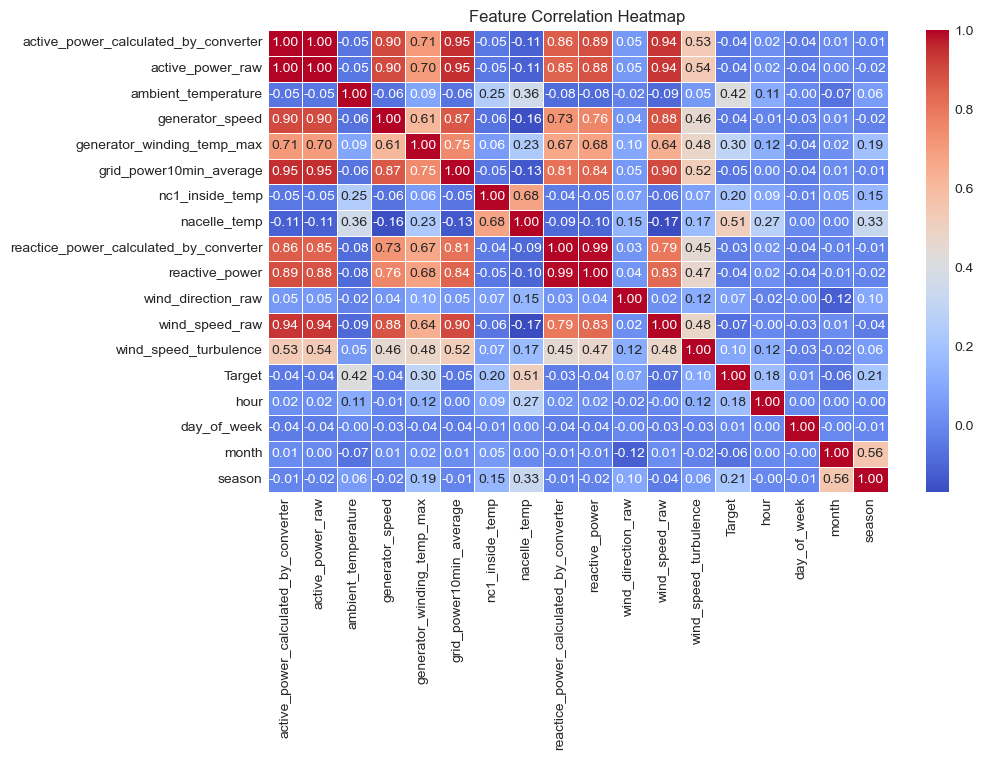



Top features correlated with target:
 Target                                    1.000000
nacelle_temp                              0.511920
ambient_temperature                       0.418106
generator_winding_temp_max                0.297822
season                                    0.213751
nc1_inside_temp                           0.198147
hour                                      0.176714
wind_speed_turbulence                     0.096724
wind_direction_raw                        0.070123
day_of_week                               0.009359
reactice_power_calculated_by_converter   -0.034431
reactive_power                           -0.035796
active_power_raw                         -0.040692
active_power_calculated_by_converter     -0.041371
generator_speed                          -0.042494
grid_power10min_average                  -0.049842
month                                    -0.063481
wind_speed_raw                           -0.069015
Name: Target, dtype: float64


In [26]:
# Correlation Heatmap
corr_matrix = df.corr()
plt.figure(figsize = (10, 6))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', fmt = ".2f", linewidths = 0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

target_corr = corr_matrix['Target'].sort_values(ascending = False)
print("\n\nTop features correlated with target:\n",target_corr)

In [27]:
# Checking Multicollinearity with VIF (Variance Inflation Factor)

X = df.copy()

X = X.drop(columns = ['Target'], errors = 'ignore')

vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data.sort_values(by = "VIF", ascending = False)

Feature         VIF
0     active_power_calculated_by_converter  198.305139
1                         active_power_raw  171.769409
9                           reactive_power  135.326409
8   reactice_power_calculated_by_converter  109.274791
5                  grid_power10min_average   14.210131
11                          wind_speed_raw    9.872437
3                          generator_speed    6.128673
4               generator_winding_temp_max    3.733707
7                             nacelle_temp    3.644012
6                          nc1_inside_temp    2.203641
16                                  season    1.888966
15                                   month    1.645303
12                   wind_speed_turbulence    1.563048
2                      ambient_temperature    1.182775
13                                    hour    1.137121
10                      wind_direction_raw    1.084663
14                             day_of_week    1.002409

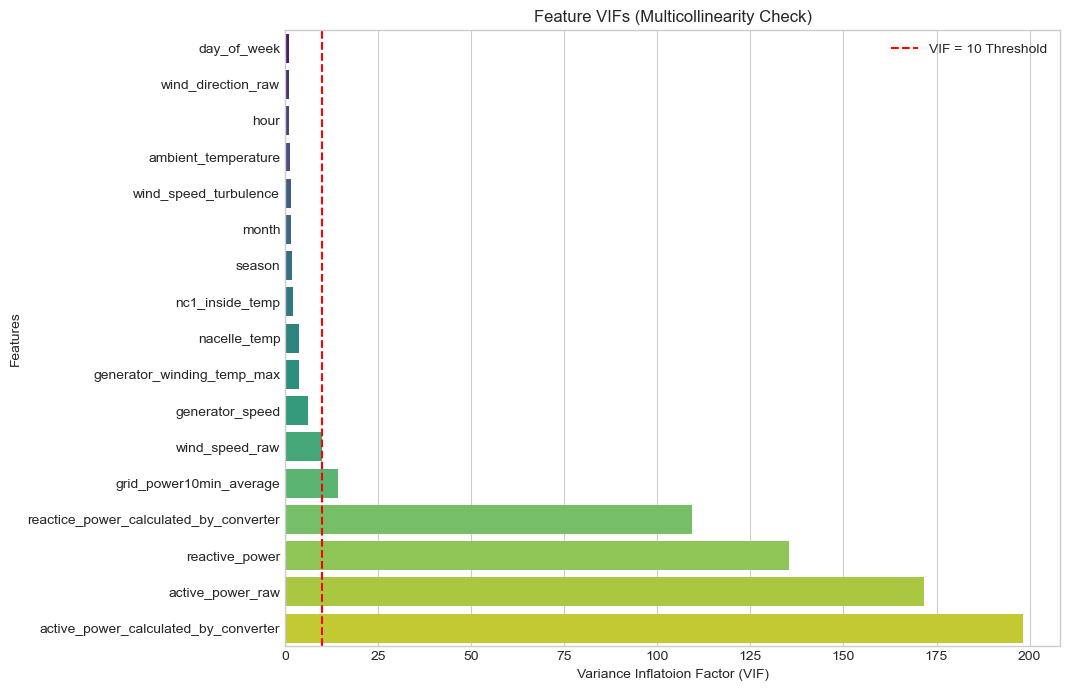

In [28]:
# VIF Visualization
vif_data_sorted = vif_data.sort_values(by = 'VIF', ascending = True)

plt.figure(figsize = (10, 8))
sns.barplot(x = 'VIF', y = 'Feature', data = vif_data_sorted,hue = 'Feature', palette = 'viridis', legend = False)
plt.axvline(x = 10, color = 'red', linestyle = '--', label = 'VIF = 10 Threshold')
plt.title('Feature VIFs (Multicollinearity Check)')
plt.xlabel('Variance Inflatoion Factor (VIF)')
plt.ylabel('Features')
plt.legend()
plt.show()

In [29]:
# Feature Selection

In [30]:
#Features to drop for Linear Regression
X_lr = df.drop(['active_power_raw','reactice_power_calculated_by_converter','Target'], axis = 1).copy()

# Features to drop for Tree-Based Models
X_tree = df.drop(['Target'], axis = 1).copy()

# Target
y = df['Target']

In [31]:
# One-Hot Encoding the Season feature
if 'season' in X_lr.columns:
    X_lr_ohe = pd.get_dummies(X_lr, columns = ['season'], prefix = 'season', drop_first = True)
else:
    X_lr_ohe = X_lr.copy()

In [32]:
# Features we don't want to scale
time_cols = [c for c in ['hour', 'day_of_week', 'month'] if c in X_lr_ohe.columns]
season_dummy_cols = [c for c in X_lr_ohe.columns if c.startswith('season_')]
dont_scale = time_cols + season_dummy_cols

In [33]:
# Numeric columns to scale
numeric_cols_to_scale = [c for c in X_lr_ohe.columns if c not in dont_scale]

In [34]:
print("Do not Scale (Keep as is):", dont_scale)
print("Numeric columns to scale:", numeric_cols_to_scale)

Do not Scale (Keep as is): ['hour', 'day_of_week', 'month', 'season_-0.47581831258795315', 'season_0.4337021794943158', 'season_1.3432226715765847']
Numeric columns to scale: ['active_power_calculated_by_converter', 'ambient_temperature', 'generator_speed', 'generator_winding_temp_max', 'grid_power10min_average', 'nc1_inside_temp', 'nacelle_temp', 'reactive_power', 'wind_direction_raw', 'wind_speed_raw', 'wind_speed_turbulence']


In [35]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_lr_ohe, y, test_size = 0.20, random_state = 42)

In [36]:
# Scaling Numeric Columns
scaler = StandardScaler()

In [37]:
# Fit & Transform both train and test- Numeric Features
X_train_scaled = X_train
X_test_scaled = X_test

if numeric_cols_to_scale:
    X_train_scaled[numeric_cols_to_scale] = scaler.fit_transform(X_train[numeric_cols_to_scale])
    X_test_scaled[numeric_cols_to_scale] =scaler.fit_transform(X_test[numeric_cols_to_scale])

In [38]:
print("\nShapes:")
print("X_train:", X_train_scaled.shape, "\nX_test:",X_test_scaled.shape)
print("\ny_train:", y_train.shape, "\ny_test:", y_test.shape )


Shapes:
X_train: (727683, 17) 
X_test: (181921, 17)

y_train: (727683,) 
y_test: (181921,)


In [39]:
print("\nSample (First 3 Rows) of scaled training data:")
display(X_train_scaled.head(3))


Sample (First 3 Rows) of scaled training data:


active_power_calculated_by_converter  ambient_temperature  \
764808                              1.176605             0.877374   
565905                             -0.752966             0.616338   
459081                             -0.422716             0.557758   

        generator_speed  generator_winding_temp_max  grid_power10min_average  \
764808         1.437085                    2.781710                 2.521937   
565905        -0.903765                   -0.324972                -0.460187   
459081        -0.441565                   -0.291983                -0.285862   

        nc1_inside_temp  nacelle_temp  reactive_power  wind_direction_raw  \
764808        -0.365979      0.142999        1.070143            1.243100   
565905         0.019727     -0.370850       -1.115623            1.310453   
459081        -0.492760     -1.406291       -0.304810           -1.381408   

        wind_speed_raw  wind_speed_turbulence      hour  day_of_week  \
764808        0.579789               3.503026  0.513420    -1.010749   
565905       -0.979235              -0.036177 -0.624781    -0.014686   
459081       -0.254377              -0.740385 -0.767056     0.483346   

           month  season_-0.47581831258795315  season_0.4337021794943158  \
764808  0.119054                        False                       True   
565905  0.413060                        False                       True   
459081 -1.056969                         True                      False   

        season_1.3432226715765847  
764808                      False  
565905                      False  
459081                      False

In [40]:
# --- REDUNDANCY & UNIQUENESS CHECK ---

# 1) Check exact duplicates (across all columns)
total_rows = len(df)
duplicate_rows = df.duplicated().sum()

print(f"Total Rows: {total_rows:,}")
print(f"Exact Duplicate Rows: {duplicate_rows:,}")
print(f"Duplicate Percentage: {(duplicate_rows / total_rows) * 100:.2f}%")

# 2) Drop duplicates to get unique data for further comparison
df_unique = df.drop_duplicates()
unique_rows = len(df_unique)

print(f"\nUnique Rows: {unique_rows:,}")
print(f"Unique Data Percentage: {(unique_rows / total_rows) * 100:.2f}%")

# 3) Check near-duplicates — same readings on key columns (non-random)
# We'll use a few key physical features
key_features = ['ambient_temperature', 'nacelle_temp', 'generator_speed', 'wind_speed', 'Target']
key_features = [f for f in key_features if f in df.columns]

if key_features:
    df_key = df[key_features]
    near_duplicates = df_key.duplicated().sum()
    print(f"\nNear-Duplicate Rows (based on key turbine readings): {near_duplicates:,}")
    print(f"Near-Duplicate Percentage: {(near_duplicates / total_rows) * 100:.2f}%")
else:
    print("\nNo matching key features found for near-duplicate check.")

# 4) Optional: simple compression ratio (for intuition)
compression_ratio = unique_rows / total_rows
print(f"\nData Redundancy Ratio (1 = no redundancy, 0.5 = 50% repetitive): {compression_ratio:.3f}")


Total Rows: 909,604
Exact Duplicate Rows: 0
Duplicate Percentage: 0.00%

Unique Rows: 909,604
Unique Data Percentage: 100.00%

Near-Duplicate Rows (based on key turbine readings): 0
Near-Duplicate Percentage: 0.00%

Data Redundancy Ratio (1 = no redundancy, 0.5 = 50% repetitive): 1.000


In [41]:
# ***************Linear Regession Baseline Model*********************

In [42]:
# Linear Regession Baseline Model
lr_model = LinearRegression()

In [43]:
lr_model.fit(X_train_scaled, y_train)

LinearRegression()

In [44]:
# Predict on test data
y_pred_lr = lr_model.predict(X_test_scaled)

In [45]:
# Evaluate Performance
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

In [46]:
# Adjusted R²
n = len(y_test)
p = X_test_scaled.shape[1]
adj_r2_lr = 1 - (1 - r2_lr) * (n - 1) / (n - p - 1)


In [47]:
print(f"Linear Regression Performance on Full Data:")
print(f"------------------------------------------")
print(f"MAE  : {mae_lr:.4f}")
print(f"RMSE : {rmse_lr:.4f}")
print(f"R²   : {r2_lr:.4f}")
print(f"Adjusted R² : {adj_r2_lr:.4f}")

Linear Regression Performance on Full Data:
------------------------------------------
MAE  : 1.3793
RMSE : 1.9361
R²   : 0.4511
Adjusted R² : 0.4510


In [48]:
# Define tolerance (within ±10% of actual value)
tolerance = 0.10  
within_tolerance = np.abs((y_test - y_pred_lr) / y_test) <= tolerance
accuracy = within_tolerance.mean() * 100

print(f"Approximate Accuracy (within ±10% tolerance): {accuracy:.2f}%")

Approximate Accuracy (within ±10% tolerance): 97.48%


In [49]:
# Influential features (Coefficients)
coef_df = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'Coefficient': lr_model.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

print("\nTop 10 Most Influential Features:")
display(coef_df.head(10))


Top 10 Most Influential Features:


Feature  Coefficient
14           season_-0.47581831258795315     1.449415
3             generator_winding_temp_max     0.991736
15             season_0.4337021794943158     0.921972
4                grid_power10min_average    -0.911043
16             season_1.3432226715765847     0.780385
6                           nacelle_temp     0.747685
1                    ambient_temperature     0.666495
5                        nc1_inside_temp    -0.344781
2                        generator_speed     0.306365
0   active_power_calculated_by_converter    -0.187417

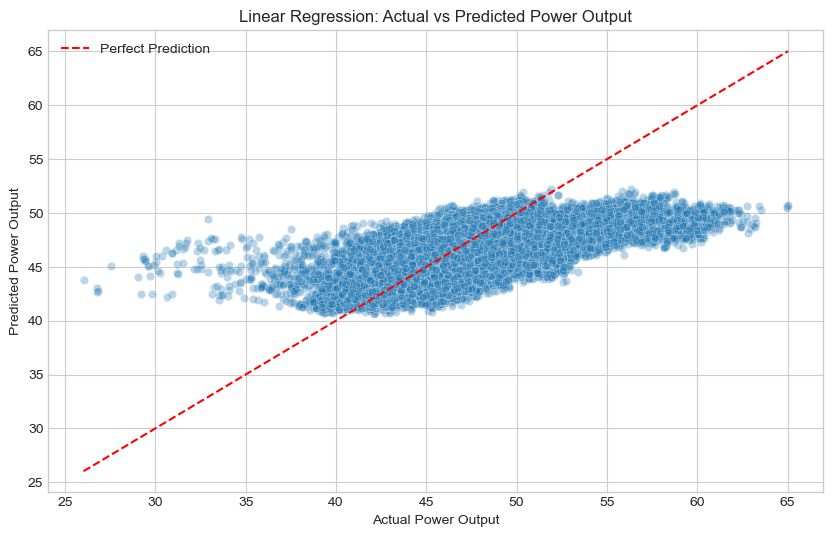

In [50]:
# Convert predictions to Series aligned with y_test
y_pred_series = pd.Series(y_pred_lr, index=y_test.index)

# Actual vs Predicted
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred_series, alpha=0.3)  # alpha=0.3 to handle dense points
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel("Actual Power Output")
plt.ylabel("Predicted Power Output")
plt.title("Linear Regression: Actual vs Predicted Power Output")
plt.legend()
plt.savefig("scatter_actual_vs_prediction.png", dpi=300, bbox_inches="tight")

plt.show()

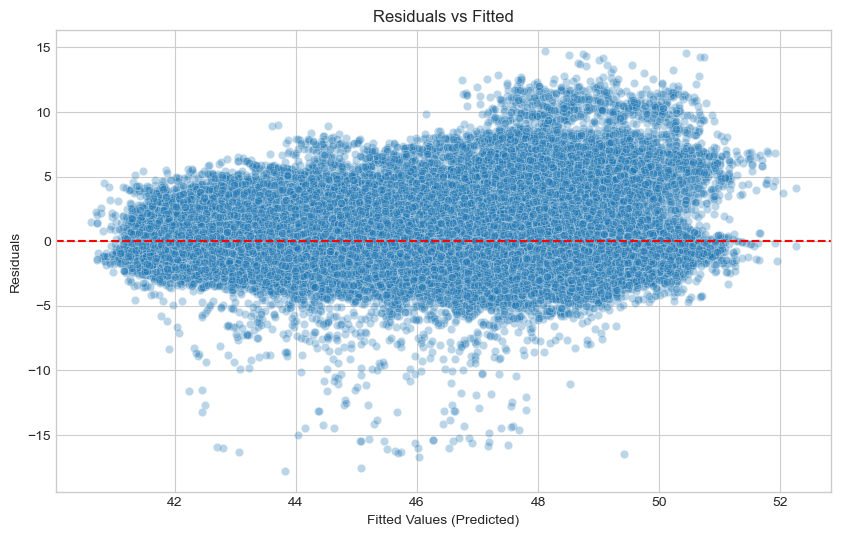

In [51]:
# Convert predictions to Series aligned with y_test
y_pred_series = pd.Series(y_pred_lr, index=y_test.index)
residuals = y_test - y_pred_series

# Residuals vs Fitted
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_pred_series, y=residuals, alpha=0.3)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted Values (Predicted)")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.show()

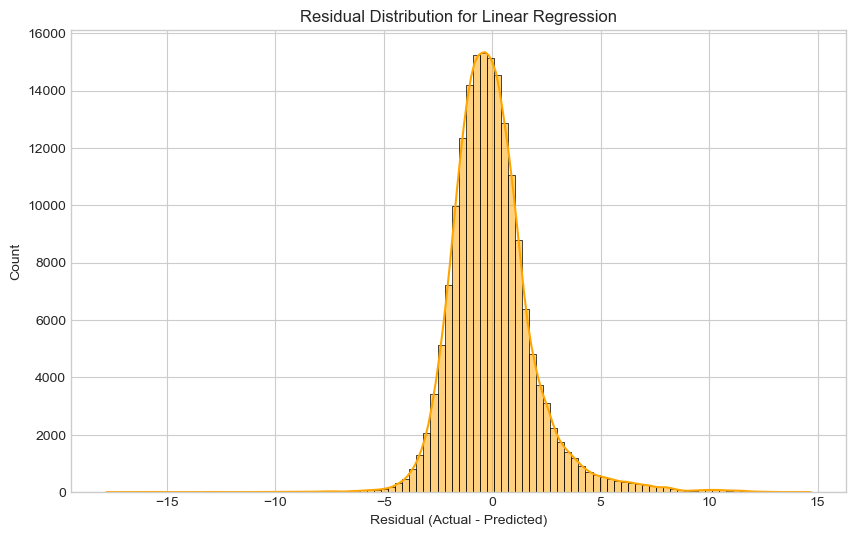

In [52]:
# Residuals plot: Prediction errors
residuals = y_test - y_pred_series
plt.figure(figsize=(10,6))
sns.histplot(residuals, bins=100, kde=True, color='orange')
plt.xlabel("Residual (Actual - Predicted)")
plt.title("Residual Distribution for Linear Regression")
plt.savefig("Resdual distribution.png", dpi=300, bbox_inches="tight")

plt.show()

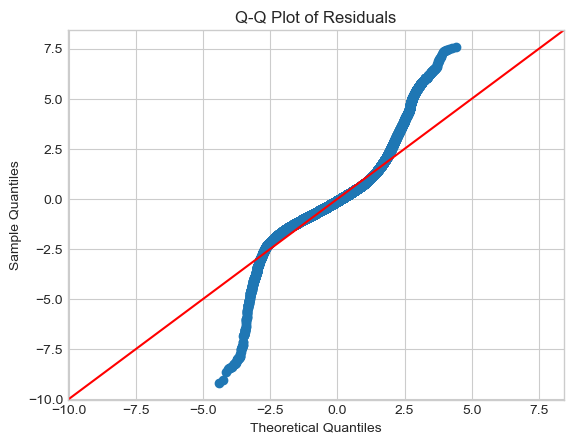

In [53]:
# Q-Q Plot (Normality check)

sm.qqplot(residuals, line='45', fit=True)
plt.title("Q-Q Plot of Residuals")
plt.show()

In [54]:
X_clean = X_lr_ohe.copy()

# Convert booleans to integers (True->1, False->0)
bool_cols = [c for c in X_clean.columns if X_clean[c].dtype == 'bool']
if bool_cols:
    X_clean[bool_cols] = X_clean[bool_cols].astype(int)

# Force all columns to numeric (safety) — non-convertible -> NaN
X_clean = X_clean.apply(pd.to_numeric, errors='coerce')

In [55]:
# Align y and drop rows with any NaN in X or y
y_clean = pd.to_numeric(y, errors='coerce')
mask = X_clean.notna().all(axis=1) & y_clean.notna()
X_clean = X_clean.loc[mask].astype(float)
y_clean = y_clean.loc[mask].astype(float)

In [56]:
print("After cleaning: X shape =", X_clean.shape, " y shape =", y_clean.shape)
print("Example dtypes:\n", X_clean.dtypes.head(10))

After cleaning: X shape = (909604, 17)  y shape = (909604,)
Example dtypes:
 active_power_calculated_by_converter    float64
ambient_temperature                     float64
generator_speed                         float64
generator_winding_temp_max              float64
grid_power10min_average                 float64
nc1_inside_temp                         float64
nacelle_temp                            float64
reactive_power                          float64
wind_direction_raw                      float64
wind_speed_raw                          float64
dtype: object


In [57]:
X_const = sm.add_constant(X_clean, has_constant='add')
model_sm = sm.OLS(y_clean, X_const).fit()

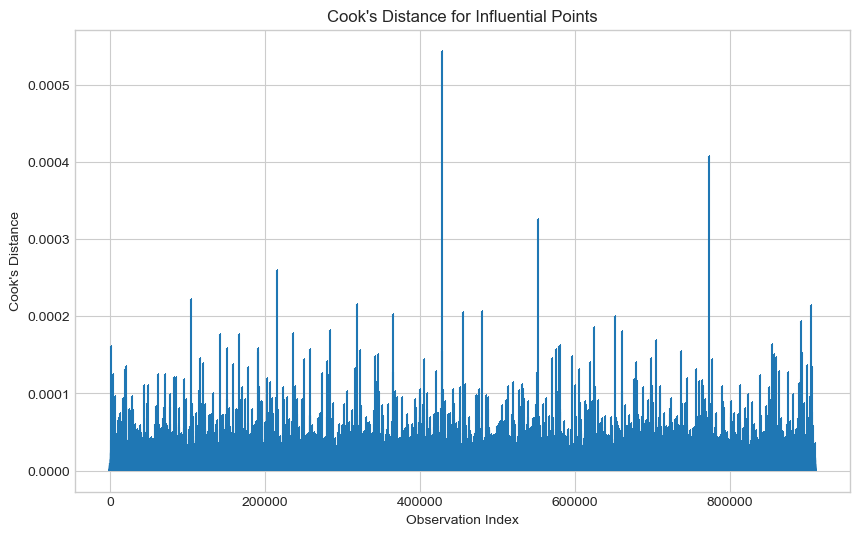

Number of highly influential points: 45674


In [58]:
# Cook's distance (diagnostics)
influence = model_sm.get_influence()
c, p = influence.cooks_distance

plt.figure(figsize=(10,6))
plt.stem(np.arange(len(c)), c, markerfmt=",", basefmt=" ")
plt.xlabel("Observation Index")
plt.ylabel("Cook's Distance")
plt.title("Cook's Distance for Influential Points")
plt.show()

# Identify high-influence points using common threshold 4/n
n = len(y_clean)
infl_pts = np.where(c > 4/n)[0]
print("Number of highly influential points:", len(infl_pts))

In [59]:
# **************RANDOM FOREST REGRESSOR************************

In [60]:
# Random Forest Regressor MOdel

rf_model = RandomForestRegressor(
    n_estimators = 100,
    random_state = 42,
    n_jobs = -1
)

In [61]:
# Train the model
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [62]:
# Predict on test data
y_pred_rf = rf_model.predict(X_test)

In [63]:
# Evaluate the performance of the Random Forest Model

mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

In [64]:
print("****Random Forest Regressor Results****")
print(f"Mean Absolute Error (MAE): {mae_rf:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.4f}")
print(f"R² Score: {r2_rf:.4f}")

****Random Forest Regressor Results****
Mean Absolute Error (MAE): 0.4329
Root Mean Squared Error (RMSE): 0.7609
R² Score: 0.9152


In [65]:
comparison = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest"],
    "MAE": [mae_lr, mae_rf],
    "RMSE": [rmse_lr, rmse_rf],
    "R²": [r2_lr, r2_rf]
})

print("\nModel Comparison:\n")
display(comparison)



Model Comparison:



Model       MAE      RMSE        R²
0  Linear Regression  1.379340  1.936138  0.451066
1      Random Forest  0.432881  0.760886  0.915221

In [66]:
# Feature importance scores
importances = rf_model.feature_importances_
feature_names = X_train.columns

In [67]:
feat_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

In [68]:
# Normalize importance for percentage scale
feat_importance_df['Importance (%)'] = 100 * feat_importance_df['Importance'] / feat_importance_df['Importance'].sum()

In [69]:
# Display top 15 features
top_features = feat_importance_df.head(15)

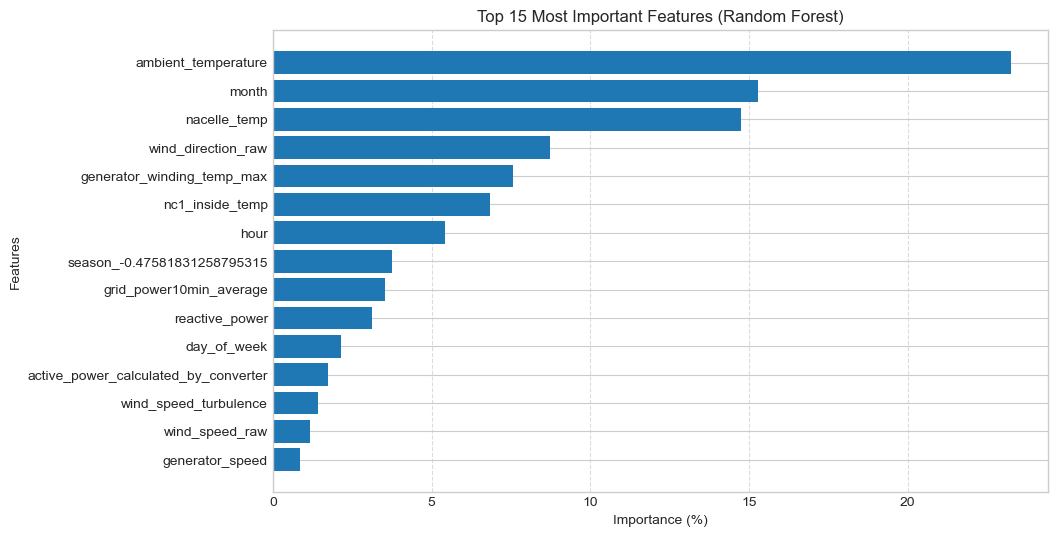

Feature  Importance  Importance (%)
1                    ambient_temperature    0.232586       23.258647
13                                 month    0.152748       15.274846
6                           nacelle_temp    0.147612       14.761166
8                     wind_direction_raw    0.087273        8.727287
3             generator_winding_temp_max    0.075651        7.565101
5                        nc1_inside_temp    0.068514        6.851357
11                                  hour    0.054331        5.433093
14           season_-0.47581831258795315    0.037499        3.749900
4                grid_power10min_average    0.035436        3.543630
7                         reactive_power    0.031291        3.129082
12                           day_of_week    0.021431        2.143142
0   active_power_calculated_by_converter    0.017461        1.746082
10                 wind_speed_turbulence    0.014302        1.430171
9                         wind_speed_raw    0.011813        1.181262
2                        generator_speed    0.008556        0.855624
15             season_0.4337021794943158    0.002661        0.266071
16             season_1.3432226715765847    0.000835        0.083541

In [70]:
# --- Visualization ---
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance (%)'])
plt.gca().invert_yaxis()
plt.xlabel("Importance (%)")
plt.ylabel("Features")
plt.title("Top 15 Most Important Features (Random Forest)")
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.show()

# Show the full table if needed
display(feat_importance_df.head(20))

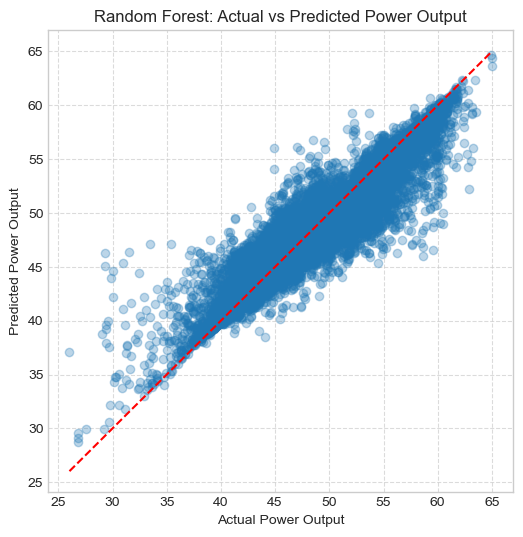

In [71]:
# Actual vs Predicted plot
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_rf, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Power Output")
plt.ylabel("Predicted Power Output")
plt.title("Random Forest: Actual vs Predicted Power Output")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

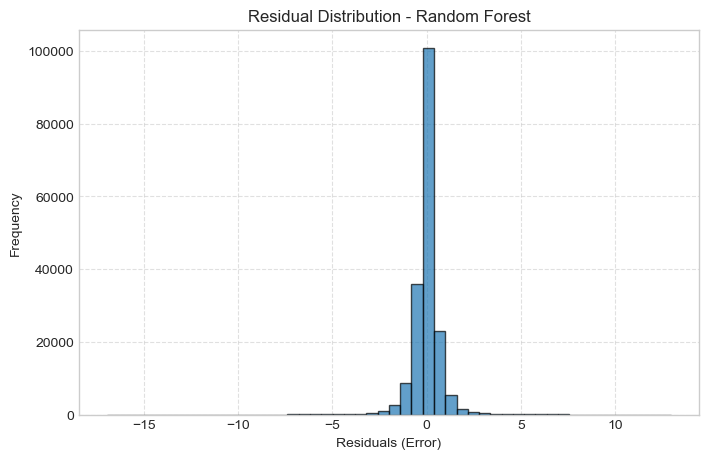

In [72]:
# Residual Plot
residuals_rf = y_test - y_pred_rf

plt.figure(figsize=(8,5))
plt.hist(residuals_rf, bins=50, edgecolor='black', alpha=0.7)
plt.xlabel("Residuals (Error)")
plt.ylabel("Frequency")
plt.title("Residual Distribution - Random Forest")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

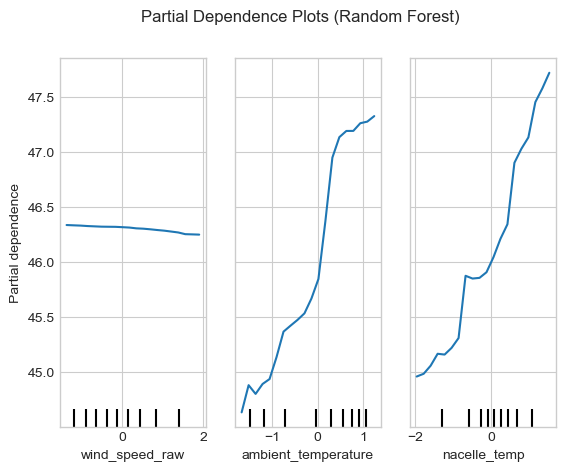

In [73]:
# Partial Dependence Plots (PDPs)

features_to_plot = ['wind_speed_raw', 'ambient_temperature', 'nacelle_temp']
PartialDependenceDisplay.from_estimator(rf_model, X_test, features_to_plot, grid_resolution=20)
plt.suptitle("Partial Dependence Plots (Random Forest)")
plt.show()


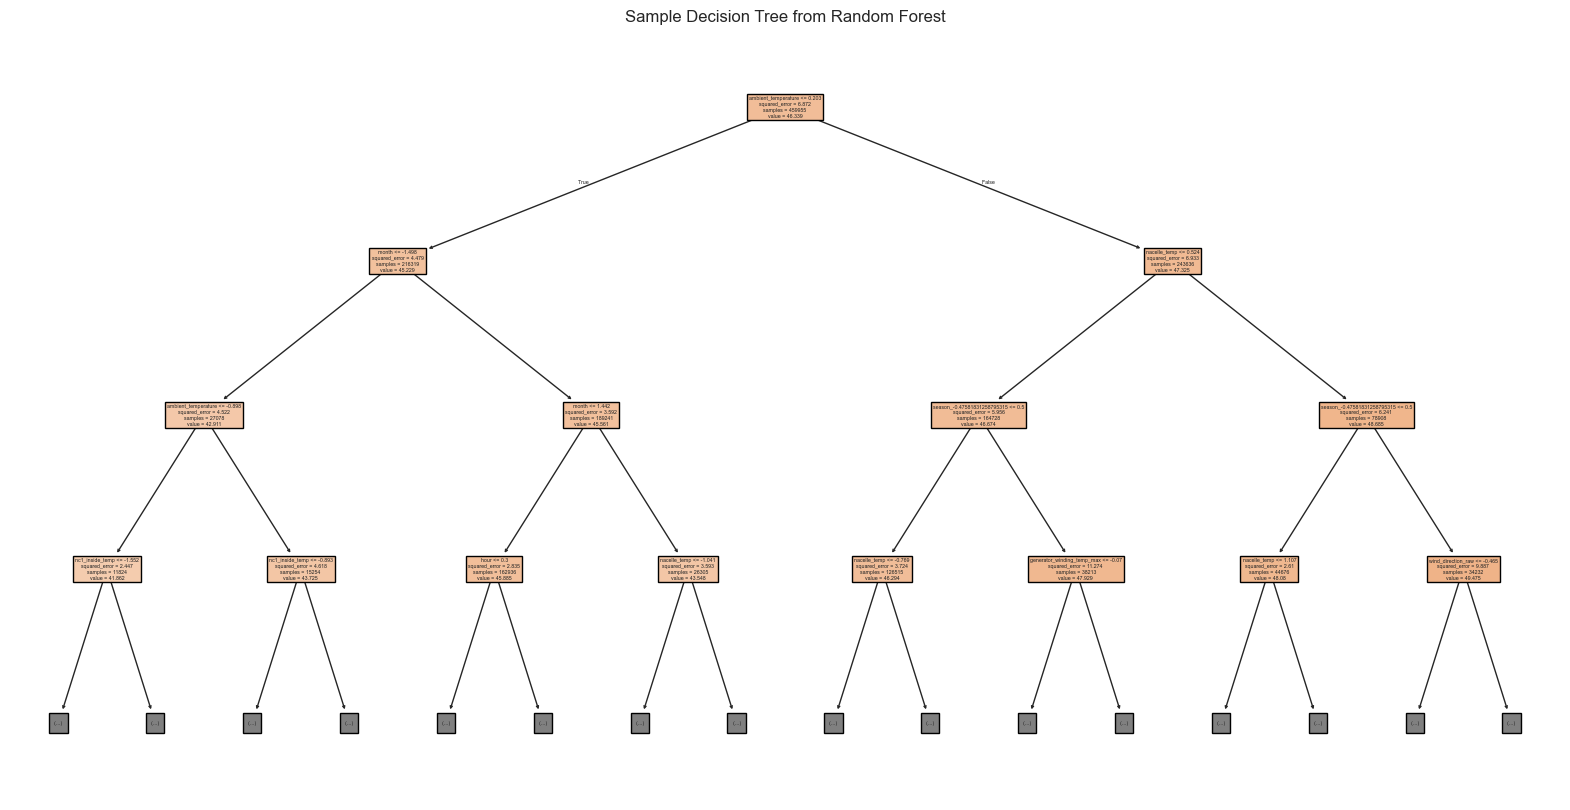

In [74]:
# Tree Depth & Complexity 

plt.figure(figsize=(20,10))
plot_tree(rf_model.estimators_[0], feature_names=X_train.columns, filled=True, max_depth=3)
plt.title("Sample Decision Tree from Random Forest")
plt.show()


In [75]:
# Define tolerance ( within ±10% of actual value)
tolerance = 0.10  
within_tolerance = np.abs((y_test - y_pred_rf) / y_test) <= tolerance
accuracy = within_tolerance.mean() * 100

print(f"Approximate Accuracy (within ±10% tolerance): {accuracy:.2f}%")

Approximate Accuracy (within ±10% tolerance): 99.71%


In [76]:
# **************XGBoost Regressor************************

In [77]:
# Train XGBoost Regressor
xgb_model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

In [78]:
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=8,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=-1, num_parallel_tree=None, ...)

In [79]:
# Predictions
y_pred_xgb = xgb_model.predict(X_test)

In [80]:
# Metrics
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

n = len(y_test)
p = X_test.shape[1]
adj_r2_xgb = 1 - ((1 - r2_xgb) * (n - 1) / (n - p - 1))


In [81]:
# ±10% Tolerance Accuracy
tolerance = 0.10
within_tolerance = np.abs((y_test - y_pred_xgb) / y_test) <= tolerance
accuracy_xgb = within_tolerance.mean() * 100

In [82]:
# Results
print("XGBoost Model Performance")
print("----------------------------------")
print(f"MAE   : {mae_xgb:.4f}")
print(f"RMSE  : {rmse_xgb:.4f}")
print(f"R²    : {r2_xgb:.4f}")
print(f"Adj R²: {adj_r2_xgb:.4f}")
print(f"Approx Accuracy (±10% tolerance): {accuracy_xgb:.2f}%")

XGBoost Model Performance
----------------------------------
MAE   : 0.7747
RMSE  : 1.1339
R²    : 0.8117
Adj R²: 0.8117
Approx Accuracy (±10% tolerance): 99.44%


In [83]:
# Feature Importance Visualization 
importances = xgb_model.feature_importances_
feature_importance_xgb = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

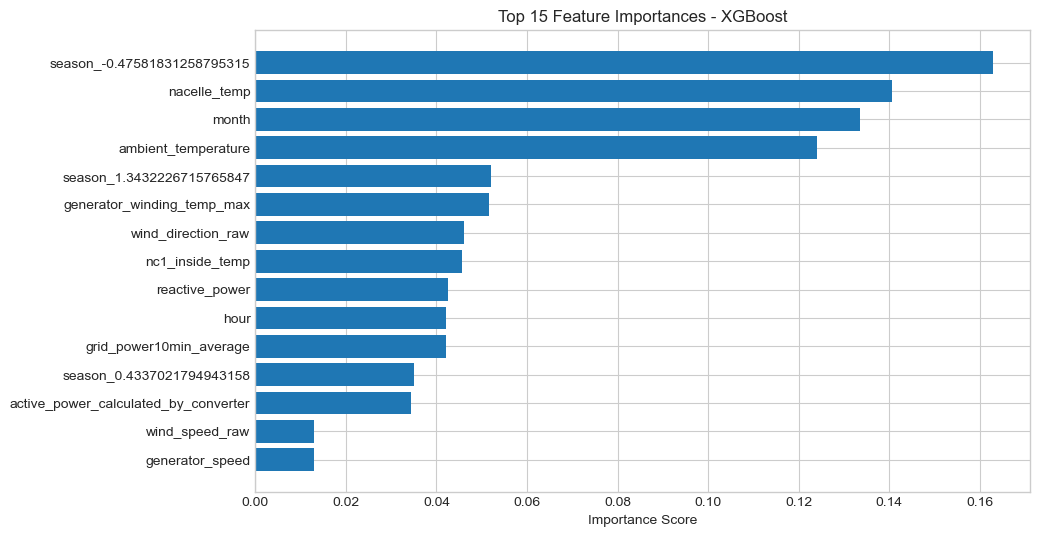

Feature  Importance
14           season_-0.47581831258795315    0.163026
6                           nacelle_temp    0.140588
13                                 month    0.133498
1                    ambient_temperature    0.123960
16             season_1.3432226715765847    0.052126
3             generator_winding_temp_max    0.051552
8                     wind_direction_raw    0.046034
5                        nc1_inside_temp    0.045688
7                         reactive_power    0.042583
11                                  hour    0.042103
4                grid_power10min_average    0.042040
15             season_0.4337021794943158    0.035077
0   active_power_calculated_by_converter    0.034444
9                         wind_speed_raw    0.012990
2                        generator_speed    0.012873
12                           day_of_week    0.012290
10                 wind_speed_turbulence    0.009126

In [84]:
plt.figure(figsize=(10,6))
plt.barh(feature_importance_xgb['Feature'].head(15), feature_importance_xgb['Importance'].head(15))
plt.gca().invert_yaxis()
plt.title("Top 15 Feature Importances - XGBoost")
plt.xlabel("Importance Score")
plt.show()

display(feature_importance_xgb.head(20))

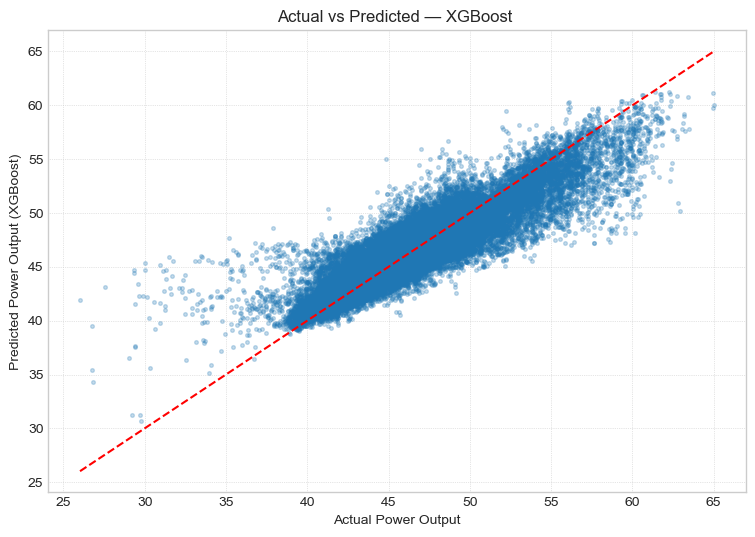

In [85]:
# --------- Actual vs Predicted  ----------
y_pred_series = pd.Series(y_pred_xgb, index=y_test.index)

plt.figure(figsize=(9,6))
plt.scatter(y_test, y_pred_series, alpha=0.25, s=7)
minval = min(y_test.min(), y_pred_series.min())
maxval = max(y_test.max(), y_pred_series.max())
plt.plot([minval, maxval], [minval, maxval], 'r--')
plt.xlabel("Actual Power Output")
plt.ylabel("Predicted Power Output (XGBoost)")
plt.title("Actual vs Predicted — XGBoost ")
plt.grid(True, linestyle=':', linewidth=0.5)
plt.show()


In [86]:
residuals_ = y_test - y_pred_series

In [87]:
# Quick check to print a few large errors
err_abs = np.abs(residuals)
top_err = err_abs.sort_values(ascending=False).head(10)
print("Top 10 absolute errors (index -> error):")
print(top_err)

Top 10 absolute errors (index -> error):
531587    17.786339
822445    17.508259
20052     16.708145
571686    16.486479
150998    16.366166
18711     16.321634
104783    16.279990
70554     16.231050
84697     16.101582
904449    15.986548
dtype: float64


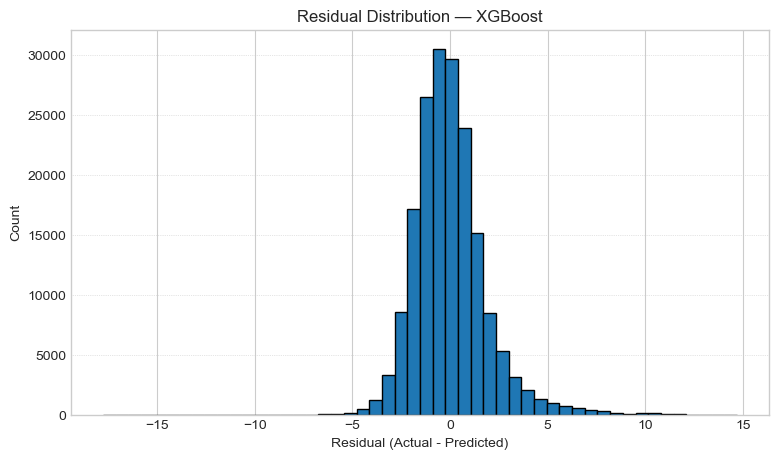

Residuals mean: -0.0052, median: -0.1984, std: 1.9361


In [88]:
# Residuals histogram
plt.figure(figsize=(9,5))
plt.hist(residuals, bins=50, edgecolor='black')
plt.xlabel("Residual (Actual - Predicted)")
plt.ylabel("Count")
plt.title("Residual Distribution — XGBoost")
plt.grid(axis='y', linestyle=':', linewidth=0.5)
plt.show()

print("Residuals mean: {:.4f}, median: {:.4f}, std: {:.4f}".format(residuals.mean(), residuals.median(), residuals.std()))

In [89]:
# Partial Dependence Plots (top 3 features) 
# Filter to ensure features exist in X_test
top3 = feature_importance_xgb['Feature'].head(3).tolist()
top3 = [f for f in top3 if f in X_test.columns]
if len(top3) == 0:
    raise ValueError("No valid PDP features found in X_test. Check `feature_importance` or X_test columns.")

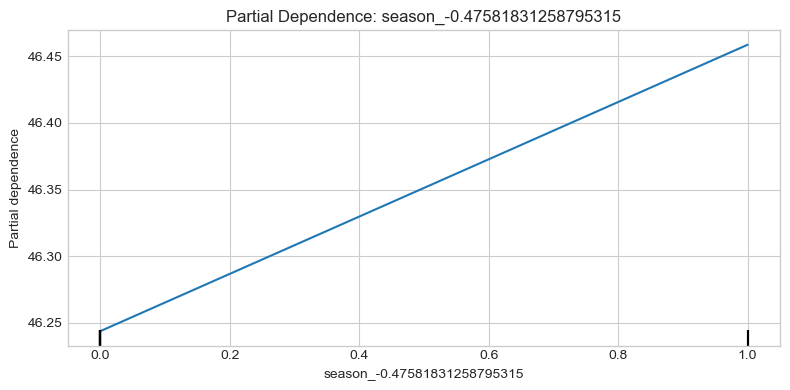

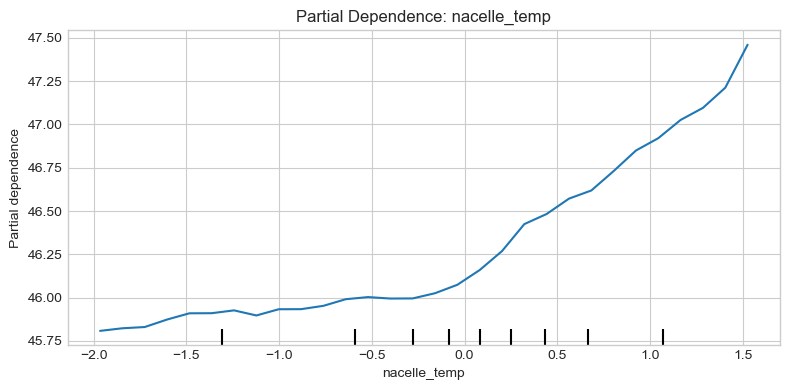

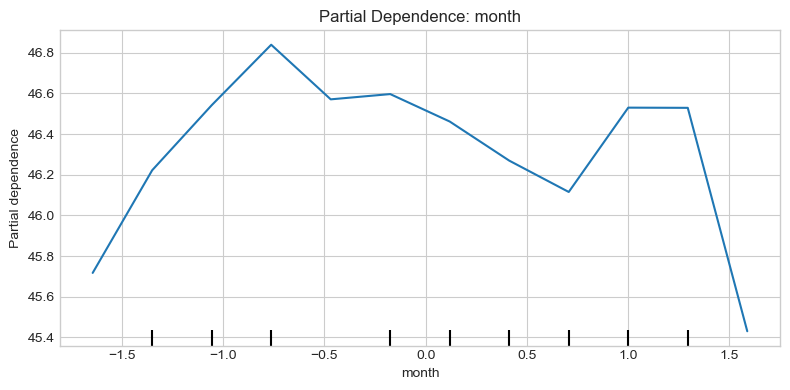

In [90]:
for feat in top3:
    plt.figure(figsize=(8,4))
    PartialDependenceDisplay.from_estimator(xgb_model, X_test, [feat], grid_resolution=30, ax=plt.gca())
    plt.title(f"Partial Dependence: {feat}")
    plt.tight_layout()
    plt.show()

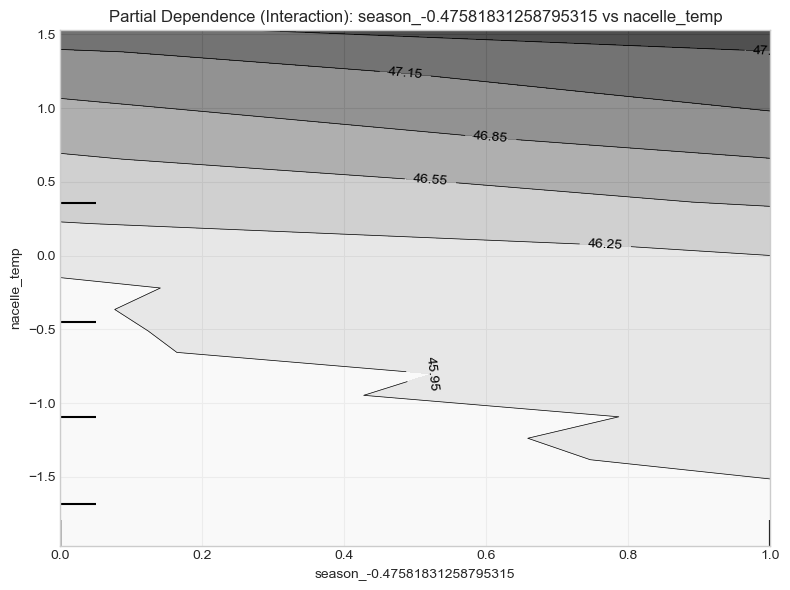

In [91]:
# Interaction PDP between top1 & top2 
if len(top3) >= 2:
    pair = (top3[0], top3[1])
    plt.figure(figsize=(8,6))
    PartialDependenceDisplay.from_estimator(xgb_model, X_test, [pair], grid_resolution=25, ax=plt.gca())
    plt.title(f"Partial Dependence (Interaction): {pair[0]} vs {pair[1]}")
    plt.tight_layout()
    plt.show()

In [92]:
# Model Comparision 

In [93]:
# ------- Checking if the models are are overfitting or not--------

# Predict on training and test data
y_train_pred_lr = lr_model.predict(X_train_scaled)
y_test_pred_lr = lr_model.predict(X_test_scaled)

y_train_pred_rf = rf_model.predict(X_train_scaled)
y_test_pred_rf  = rf_model.predict(X_test_scaled)

y_train_pred_xgb = xgb_model.predict(X_train_scaled)
y_test_pred_xgb = xgb_model.predict(X_test_scaled)

# -------Compute metrics---------

# ---------Training metrics--------

# Linear Regression
mae_train_lr = mean_absolute_error(y_train, y_train_pred_lr)
rmse_train_lr = np.sqrt(mean_squared_error(y_train, y_train_pred_lr))
r2_train_lr = r2_score(y_train, y_train_pred_lr)

# Random Forest Regressor
mae_train_rf = mean_absolute_error(y_train, y_train_pred_rf)
rmse_train_rf = np.sqrt(mean_squared_error(y_train, y_train_pred_rf))
r2_train_rf = r2_score(y_train, y_train_pred_rf)

# XGBoost 
mae_train_xgb = mean_absolute_error(y_train, y_train_pred_xgb)
rmse_train_xgb = np.sqrt(mean_squared_error(y_train, y_train_pred_xgb))
r2_train_xgb = r2_score(y_train, y_train_pred_xgb)


# ---------Testing metrics----------

# Linear Regression
mae_test_lr = mean_absolute_error(y_test, y_test_pred_lr)
rmse_test_lr = np.sqrt(mean_squared_error(y_test, y_test_pred_lr))
r2_test_lr = r2_score(y_test, y_test_pred_lr)

# Random Forest Regressor
mae_test_rf = mean_absolute_error(y_test, y_test_pred_rf)
rmse_test_rf = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))
r2_test_rf = r2_score(y_test, y_test_pred_rf)

# XGBoost
mae_test_xgb = mean_absolute_error(y_test, y_test_pred_xgb)
rmse_test_xgb = np.sqrt(mean_squared_error(y_test, y_test_pred_xgb))
r2_test_xgb = r2_score(y_test, y_test_pred_xgb)

# -----Linear Regression-------
print("Linear regression Performance Comparison")
print("--------------------------------------")
print(f"Train MAE  : {mae_train_lr:.4f}   | Test MAE  : {mae_test_lr:.4f}")
print(f"Train RMSE : {rmse_train_lr:.4f}   | Test RMSE : {rmse_test_lr:.4f}")
print(f"Train R²   : {r2_train_lr:.4f}     | Test R²   : {r2_test_lr:.4f}")

tolerance = 0.10
acc_train_lr = (np.abs((y_train - y_train_pred_lr) / y_train) <= tolerance).mean() * 100
acc_test_lr = (np.abs((y_test - y_test_pred_lr) / y_test) <= tolerance).mean() * 100
print(f"Train Accuracy (±10%): {acc_train_lr:.2f}% | Test Accuracy (±10%): {acc_test_lr:.2f}%\n\n")


# ----Random Forest Regressor-----
print("Random Forest Performance Comparison")
print("--------------------------------------")
print(f"Train MAE  : {mae_train_rf:.4f}   | Test MAE  : {mae_test_rf:.4f}")
print(f"Train RMSE : {rmse_train_rf:.4f}   | Test RMSE : {rmse_test_rf:.4f}")
print(f"Train R²   : {r2_train_rf:.4f}     | Test R²   : {r2_test_rf:.4f}")

acc_train_rf = (np.abs((y_train - y_train_pred_rf) / y_train) <= tolerance).mean() * 100
acc_test_rf = (np.abs((y_test - y_test_pred_rf) / y_test) <= tolerance).mean() * 100
print(f"Train Accuracy (±10%): {acc_train_rf:.2f}% | Test Accuracy (±10%): {acc_test_rf:.2f}% \n\n")


# -----XGBoost-------
print("XGBoost Performance Comparison")
print("--------------------------------------")
print(f"Train MAE  : {mae_train_xgb:.4f}   | Test MAE  : {mae_test_xgb:.4f}")
print(f"Train RMSE : {rmse_train_xgb:.4f}   | Test RMSE : {rmse_test_xgb:.4f}")
print(f"Train R²   : {r2_train_xgb:.4f}     | Test R²   : {r2_test_xgb:.4f}")


acc_train_xgb = (np.abs((y_train - y_train_pred_xgb) / y_train) <= tolerance).mean() * 100
acc_test_xgb = (np.abs((y_test - y_test_pred_xgb) / y_test) <= tolerance).mean() * 100
print(f"Train Accuracy (±10%): {acc_train_xgb:.2f}% | Test Accuracy (±10%): {acc_test_xgb:.2f}%\n\n")



Linear regression Performance Comparison
--------------------------------------
Train MAE  : 1.3848   | Test MAE  : 1.3793
Train RMSE : 1.9452   | Test RMSE : 1.9361
Train R²   : 0.4483     | Test R²   : 0.4511
Train Accuracy (±10%): 97.44% | Test Accuracy (±10%): 97.48%


Random Forest Performance Comparison
--------------------------------------
Train MAE  : 0.1625   | Test MAE  : 0.4329
Train RMSE : 0.2901   | Test RMSE : 0.7609
Train R²   : 0.9877     | Test R²   : 0.9152
Train Accuracy (±10%): 99.99% | Test Accuracy (±10%): 99.71% 


XGBoost Performance Comparison
--------------------------------------
Train MAE  : 0.7536   | Test MAE  : 0.7747
Train RMSE : 1.0949   | Test RMSE : 1.1339
Train R²   : 0.8252     | Test R²   : 0.8117
Train Accuracy (±10%): 99.51% | Test Accuracy (±10%): 99.44%




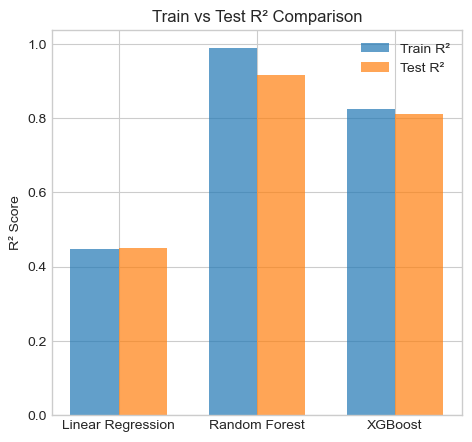

In [94]:
# ---------- PLOT 1: R² Comparison --------------
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
models = ['Linear Regression', 'Random Forest', 'XGBoost']
train_scores = [r2_train_lr, r2_train_rf, r2_train_xgb]
test_scores = [r2_test_lr, r2_test_rf, r2_test_xgb]

x = np.arange(len(models))
width = 0.35

plt.bar(x - width/2, train_scores, width, label='Train R²', alpha=0.7)
plt.bar(x + width/2, test_scores, width, label='Test R²', alpha=0.7)
plt.title("Train vs Test R² Comparison")
plt.ylabel("R² Score")
plt.xticks(x, models)
plt.legend()
plt.show()

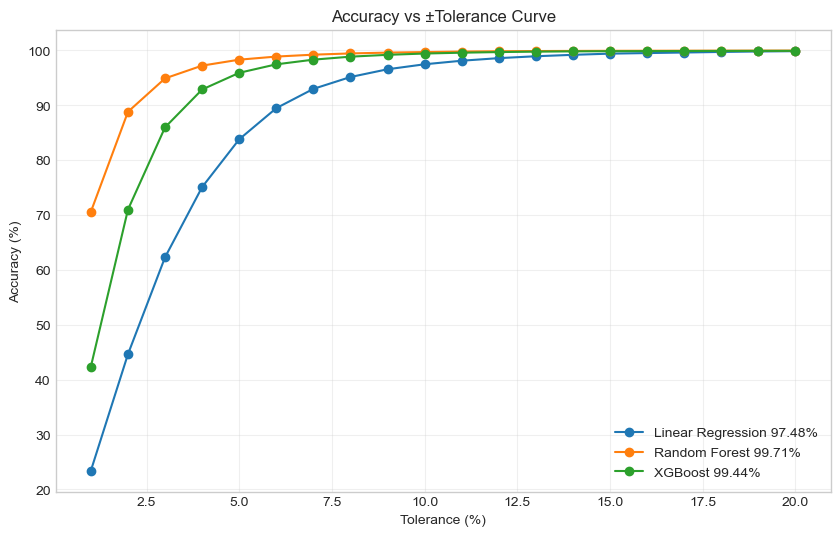

In [95]:
# ----------- Accuracy VS Tolerance Curve------
preds = {
    "Linear Regression": y_pred_lr,
    "Random Forest": y_pred_rf,
    "XGBoost": y_pred_xgb
}

# Actual values
actual = y_test.values 

# Define tolerance range (1% to 20%)
tolerances = np.linspace(0.01, 0.20, 20)

# Compute accuracy within each tolerance for each model
accuracies = {}
for name, y_pred in preds.items():
    model_acc = []
    for tol in tolerances:
        within = np.abs((actual - y_pred) / actual) <= tol
        model_acc.append(within.mean() * 100)
    accuracies[name] = model_acc

# Plot
plt.figure(figsize=(10,6))
for name, acc in accuracies.items():
    idx = np.argmin(np.abs(tolerances - 0.10))
    plt.plot(tolerances * 100, acc, 'o-', label=f"{name} {acc[idx]:.2f}%")

plt.title("Accuracy vs ±Tolerance Curve")
plt.xlabel("Tolerance (%)")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


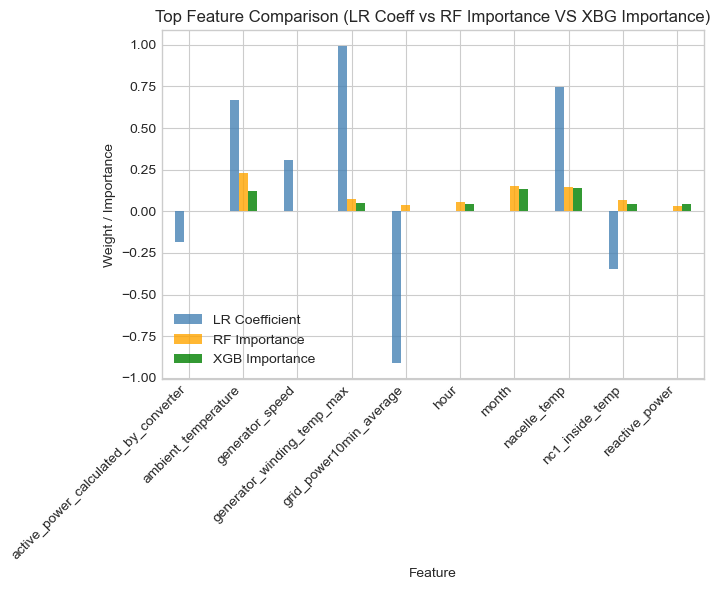

In [96]:
# ---------- Feature Importance Comparison --------------
lr_coef_df_sorted = coef_df.head(10)

rf_importances_sorted = feat_importance_df.head(10)

xgb_importances_sorted = feature_importance_xgb.head(10)

plt.figure(figsize = (20, 6))
plt.subplot(1, 3, 3)

dataframes_to_merge = [
    lr_coef_df_sorted[['Feature', 'Coefficient']],
    rf_importances_sorted[['Feature', 'Importance']],
    xgb_importances_sorted[['Feature', 'Importance']]
]

top_features = reduce(
    lambda left, right: pd.merge(left, right, on='Feature', how='outer'),
    dataframes_to_merge
).fillna(0).head(10)


top_features.plot(
    x='Feature',
    kind='bar',
    ax=plt.gca(),
    color=['steelblue', 'orange', 'green'],
    alpha=0.8
)

plt.title("Top Feature Comparison (LR Coeff vs RF Importance VS XBG Importance)")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Weight / Importance")
plt.legend(['LR Coefficient', 'RF Importance','XGB Importance'])

plt.tight_layout()
plt.show()